## Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

This initial view is useful for understanding the columns available and checking for any immediate data quality issues such as missing or inconsistent values.

In [2]:
# Read the data set
gold_df = pd.read_csv('gld_price_data.csv')
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


##### In the step below, we remove the 'Date' column from the dataset:

The 'Date' column is often not directly useful for numerical modeling, especially in machine learning algorithms that require purely numerical input.

By dropping it, we focus only on the relevant numerical features for further analysis or model training.

The resulting DataFrame gold_df_1 contains all the original data except for the 'Date' column.



In [4]:
# Drop date column
gold_df_1 = gold_df.drop(columns=['Date'])

##### The next line of code returns the number of rows and columns in the dataset as a tuple (rows, columns).

It helps us understand the size of the dataset before performing any data preprocessing or analysis.

For example, if the output is (2290, 6), it means the dataset contains 2,290 rows and 6 columns.

Knowing the shape is useful for:

Verifying that data was loaded correctly.

Planning preprocessing steps.

Understanding the overall structure of the dataset.

In [5]:
# Shape of the dataset
gold_df.shape

(2290, 6)

##### The next line of code:

It helps identify missing values in any column.

It shows whether each column's data type is appropriate (e.g., numeric for calculations, object for text).

This is especially useful before data cleaning or modeling to ensure the data types are compatible with your chosen methods or algorithms.

In [6]:
# Data type information
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


##### Interpretation of info Output

Number of entries (rows): 2290 rows are present in the dataset.

Number of columns: There are 6 columns in total.

Non-null values: Each column has 2290 non-null values, meaning there are no missing values in the dataset.

Data types: 'Date' is of type object, which typically means it’s stored as a string.

All other columns (SPX, GLD, USO, SLV, EUR/USD) are of type float64, meaning they contain numerical data with decimal points.

Memory usage: The DataFrame uses approximately 107.5 KB of memory.

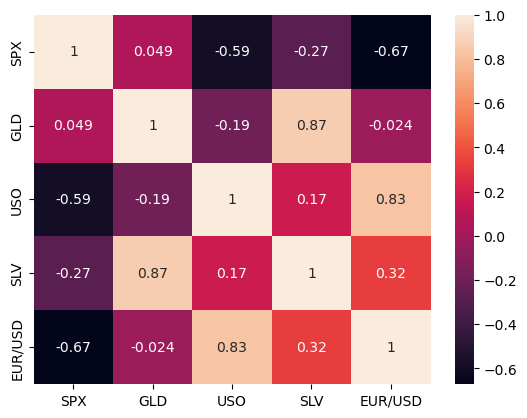

In [7]:
# Plot the heatmap
sns.heatmap(gold_df_1.corr(), annot=True)
plt.show()

##### Heatmap Summary 
GLD & SLV (0.87): Strong positive correlation — gold and silver prices move together.

GLD & USO (-0.19) and GLD & SPX (0.049): Weak correlation — little to no linear relationship.

GLD & EUR/USD (-0.024): No meaningful correlation.

SPX & EUR/USD (-0.67) and SPX & USO (-0.59): Strong negative correlation — move in opposite directions.

Conclusion:
SLV (Silver) is the most strongly related to GLD (Gold) and may be a good predictor. Other variables show weak or no direct correlation with gold price.

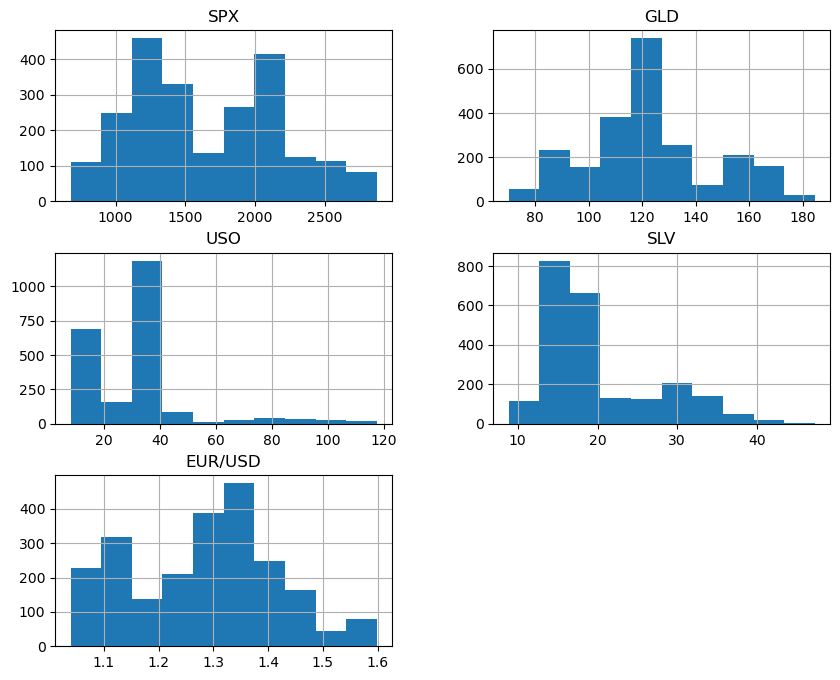

In [8]:
# Plot histograms for all columns (hist will ignore non-numeric by default)
gold_df.hist(figsize=(10,8))
plt.show()

#### Insights from the Histograms 
SPX: Multi-modal, wide range — reflects market volatility.

GLD: Slightly right-skewed — most gold prices around 120–130.

USO: Right-skewed — most oil prices below 50, with some high outliers.

SLV: Right-skewed — silver prices mostly between 15–30.

EUR/USD: Roughly normal distribution — centered around 1.3.

Useful for spotting skewness, outliers, and deciding on preprocessing steps.


## Feature Engineering 

In [9]:
# Finding null values
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#### Result Interpretation:
All columns show 0 null values.

This means the dataset is complete — no missing entries in any column.

No need for data imputation or row/column removal.

Ensures clean data, which is ideal for accurate analysis and modeling.


In [10]:
# Statistical measures of the data
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


##### Statistical Summary – Short Insights
SPX: Very wide range and high std dev → highly volatile.

GLD: Prices mostly between 110–130; moderate variation.

USO: Large range and std dev → possible outliers.

SLV: Values mostly 15–23; some high spikes.

EUR/USD: Stable with small variation; no major outliers.

Useful for spotting variability, outliers, and preparing for scaling or modeling.

<Axes: xlabel='GLD', ylabel='Density'>

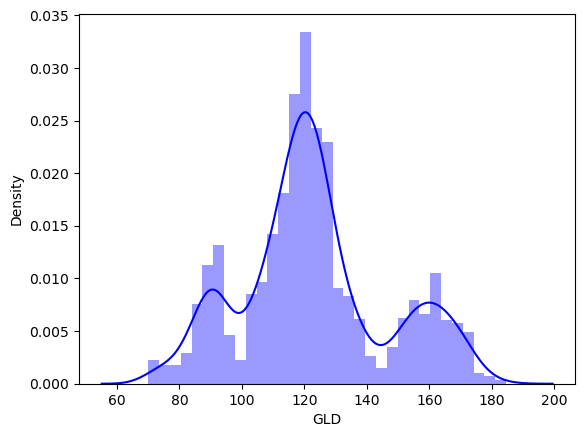

In [11]:
# Cheking the distribution of the gold price
sns.distplot(gold_df['GLD'], color='Blue')

##### Short Insights
The GLD (gold price) distribution is roughly normal, centered around 120.

Multiple peaks indicate a slightly multimodal pattern.

Mild right skew with a long tail → some higher price outliers.

Most values fall between 100 and 140.

Shows gold prices are concentrated but have occasional spikes.

## Feature Selection_1

X (Features):
Contains all columns except 'Date' and 'GLD'.
These are the input variables used to predict gold prices.

Y (Target):
Contains only the 'GLD' column — the target variable (gold price) to be predicted.

In [12]:
# Random Forest Regressor categorical and response variable
X = gold_df.drop(['Date', 'GLD'], axis=1)
Y = gold_df['GLD']

In [13]:
# Categorical variables
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
# Response Variable
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Model selection_1 : Random Forest Regressor

##### Why Random Forest is Used

Handles non-linear relationships.

Provides feature importance scores.

Robust to outliers and noise.

No need for feature scaling.

Works well on tabular data like this.

In [15]:
# Test train split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=42)

In [44]:
#from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=2,              # limit depth of trees
    min_samples_split=10,     # require more samples to split
    min_samples_leaf=7,       # require more samples in each leaf
    random_state=42
)

regressor.fit(X_train, Y_train)


RandomForestRegressor(max_depth=2, min_samples_leaf=7, min_samples_split=10,
                      random_state=42)

##### Purpose of Each Parameter:
`n_estimators=100` : More trees = better performance (usually).

`max_depth=2` : Limits tree complexity to prevent overfitting.

`min_samples_split=10` : Splits happen only if node has 10+ samples → adds regularization.

`min_samples_leaf=7` : Ensures leaves aren't too small → improves generalization.

`random_state=42` : Ensures same results every time you run it.

In [45]:
# Training the Random Forest model
train_predictions_rfr = regressor.predict(X_train)
print(train_predictions_rfr)

[153.79610346 119.23514123  97.48357223 ... 147.83727068 119.23514123
 158.59726012]


In [46]:
# R squarred error in Random Forest train data
train_score = metrics.r2_score(Y_train, train_predictions_rfr)
print("R squarred training error:", train_score)

R squarred training error: 0.8161853509911807



R² = 0.816 means the model explains 81.6% of the variance in gold prices on the training data.

Indicates a good fit, but not perfect — the model captures most patterns without overfitting.


In [47]:
# Prediction on the Random Forest test data
test_predictions_rfr = regressor.predict(X_test)

In [48]:
# Print of the Random Forest test data
print(test_predictions_rfr)

[119.23514123 132.35095909 119.74670715  97.48357223 119.23514123
 119.23514123 119.23514123 119.23514123 119.23514123  97.48357223
  97.48357223 158.59726012 146.73634168  97.48357223 158.59726012
  97.48357223 119.23514123 119.23514123 119.23514123 143.36632801
 119.23514123 119.23514123  97.48357223  97.48357223 119.23514123
 119.23514123 119.23514123 119.23514123  97.48357223 119.23514123
 158.59726012  97.48357223 158.59726012 119.23514123 119.23514123
 119.23514123 143.36632801 158.59726012 158.59726012 147.83727068
 119.23514123 119.23514123 119.23514123 119.23514123 119.23514123
 119.23514123  97.48357223 119.23514123 128.57154515 119.23514123
  97.48357223 128.57154515  97.48357223 158.59726012 146.73634168
 119.23514123 158.59726012 140.39558696  97.48357223 119.23514123
  97.48357223  97.48357223 119.23514123 119.23514123  97.48357223
 119.23514123 119.23514123 119.23514123 158.59726012  97.48357223
  97.48357223 156.54853501 154.60557366  97.48357223 147.83727068
  97.48357

In [49]:
# R squarred error in Random Forest test data
error_score = metrics.r2_score(Y_test, test_predictions_rfr)
print("R squarred error:", error_score)

R squarred error: 0.8137497694340746


R² = 0.814 means the model explains 81.4% of the variance in gold prices on the test set.

This score is very close to the training R² (0.816), indicating the model generalizes well and is not overfitting.

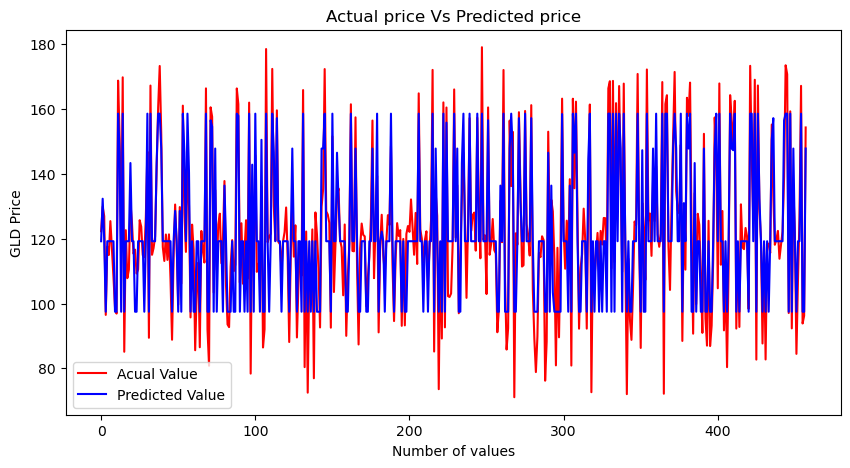

In [51]:
# Plotting the difference between actual and predicted value
Y_test=list(Y_test)
plt.figure(figsize=(10, 5))
plt.plot(Y_test, color='Red', label ='Acual Value')
plt.plot(test_predictions_rfr, color='blue', label='Predicted Value')
plt.title('Actual price Vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

##### Actual vs Predicted Price Plot – Explanation
This line plot compares the actual gold prices (GLD) with the predicted prices from the Random Forest model on the test data.

##### Key Observations:
Red line: Actual gold prices

Blue line: Predicted prices from the model

The lines follow similar patterns, showing the model is generally capturing trends in the data.

Some deviations between the lines indicate prediction errors, which is expected in real-world data.

##### Conclusion:
The model predicts reasonably well, as the predicted values (blue) closely track the actual values (red).

Minor differences suggest room for improvement, but overall performance is strong — supported by the high R² score (~0.814).



## Feature Selection_2 

X (Features): Contains all columns except 'Date' and 'GLD'. These are the input variables used to predict gold prices.

Y (Target): Contains only the 'GLD' column — the target variable (gold price) to be predicted.

In [52]:
# Define features and target where feature = x and target = y 
X = gold_df.drop(['Date', 'GLD'], axis=1)
Y = gold_df['GLD']

In [53]:
# Categorical variables
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [54]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

## Model selection_2 : Gradient Boosting Algorithm

##### Why Gradient Boosting is Chosen 

Builds strong models from weak learners (typically decision trees).

Captures complex, non-linear relationships.

Focuses on correcting previous errors, improving accuracy.

Often performs better than single models like Random Forest on structured data.

Good for small to medium datasets with high predictive power.

In [127]:
# Train-test split for Gradient Boosting 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [114]:
# Step 3: Initialize and train the model
gbr = GradientBoostingRegressor(
    n_estimators=41,
    learning_rate=0.03,
    max_depth=2,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=2, min_samples_leaf=10,
                          min_samples_split=20, n_estimators=41,
                          random_state=42)

##### Purpose of Each Parameter (GradientBoostingRegressor)

`n_estimators=41`: Number of trees to build sequentially; more trees can improve performance but increase training time.

`learning_rate=0.03`: Controls how much each tree contributes to the final prediction. Lower values = slower learning but better generalization.

`max_depth=2`: Limits the depth of each tree → keeps them shallow to avoid overfitting.

`min_samples_split=20`: A node must have at least 20 samples before it can be split → reduces complexity and overfitting.

`min_samples_leaf=10`: Each leaf (end node) must have at least 10 samples → prevents overly specific splits.

`random_state=42`: Ensures the same results every time you run the code (for reproducibility).

In [115]:
# Training prediction for Gradient Boost
train_predictions_gbr = gbr.predict(X_train)
print(train_predictions_gbr)

[146.04865507 119.00859908 110.84473897 ... 143.25717203 121.26770451
 147.1905469 ]


In [116]:
# R squarred value in Gradient Boost train data
train_r2 = r2_score(Y_train, train_predictions_gbr)
print("Gradient Boosting R² on training data:", train_r2)

Gradient Boosting R² on training data: 0.7964667402791001


R² = 0.796 means the model explains 79.6% of the variance in gold prices on the training data.

This indicates a good fit, though slightly lower than Random Forest's training R² (~0.816).

Suggests the model is learning well but with less risk of overfitting, making it potentially more generalizable.


In [117]:
# Prediction on the Gradient Boost test data
test_predictions_gbr = gbr.predict(X_test)
print(test_predictions_gbr)

[119.00859908 130.4274444  127.81769389 112.77492102 119.00859908
 119.00859908 119.00859908 119.00859908 113.96722832 108.96481905
 108.05874789 148.56767917 140.94102593 108.96481905 148.56767917
 103.09465402 121.26770451 119.00859908 119.00859908 132.77956423
 121.26770451 119.00859908 108.96481905 108.96481905 113.96722832
 119.00859908 119.00859908 119.00859908 112.57202548 121.26770451
 147.1905469  104.41793003 147.1905469  119.00859908 113.96722832
 119.00859908 133.58801845 148.32341811 148.56767917 143.25717203
 119.00859908 119.00859908 119.00859908 119.00859908 119.00859908
 113.96722832 103.09465402 119.00859908 129.6554837  119.00859908
 108.96481905 129.6554837  108.96481905 147.1905469  140.94102593
 121.26770451 147.1905469  132.14119412 108.96481905 119.00859908
 114.34831953 104.41793003 113.96722832 119.00859908 103.09465402
 119.00859908 119.00859908 119.00859908 147.1905469  103.09465402
 103.09465402 147.42578734 147.42578734 108.96481905 141.88003976
 108.96481

In [118]:
# R squarred error in Gradient Boost test data
test_r2 = r2_score(Y_test, test_predictions_gbr)
print("Gradient Boosting R² on test data:", test_r2)

Gradient Boosting R² on test data: 0.7874779375708731


R² = 0.787 means the model explains 78.7% of the variance in gold prices on the test set.
Slightly lower than the training R² (0.796), which is expected and normal.

Indicates the model performs consistently on unseen data, with no major overfitting and decent generalization.

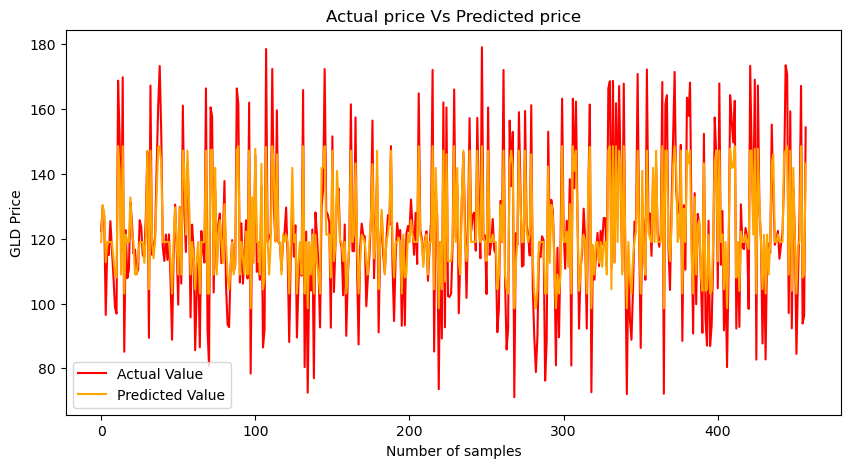

In [119]:
# Convert both to Series and reset index
Y_test_series = pd.Series(Y_test).reset_index(drop=True)
test_predictions_series = pd.Series(test_predictions_gbr)

plt.figure(figsize=(10, 5))
plt.plot(Y_test_series, color='red', label='Actual Value')
plt.plot(test_predictions_series, color='orange', label='Predicted Value')
plt.title('Actual price Vs Predicted price')
plt.xlabel('Number of samples')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

##### Key Observations

Predicted values (orange) closely follow actual values (red).

Model performs well in stable price ranges.

Slight mismatches at sharp peaks and drops.

Predictions are smoother than actual fluctuations.


##### Conclusion 
Gradient Boosting predicts gold prices accurately overall, with good trend capture and slight underperformance at extremes — a strong model with room for fine-tuning.


## Model Comparison

In [120]:
print("🔹 Dataset Sizes Used for Both Models")

# Feature sets
print("X_train shape:", X_train.shape)  # (rows, columns)
print("X_test shape :", X_test.shape)

# Target sets
print("Y_train length:", len(Y_train))
print("Y_test length :", len(Y_test))

# Prediction lengths
print("\n🔹 Prediction Output Sizes")
print("Random Forest predictions:", len(test_predictions_rfr))
print("Gradient Boosting predictions:", len(test_predictions_gbr))


🔹 Dataset Sizes Used for Both Models
X_train shape: (1832, 4)
X_test shape : (458, 4)
Y_train length: 1832
Y_test length : 458

🔹 Prediction Output Sizes
Random Forest predictions: 458
Gradient Boosting predictions: 458


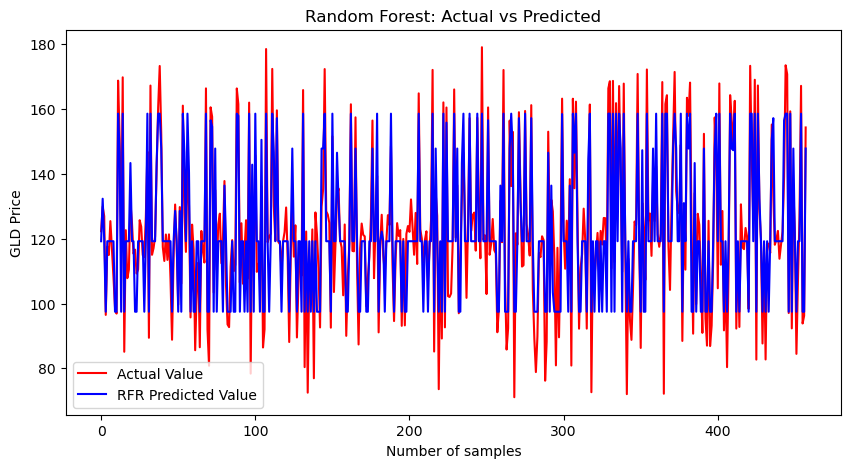

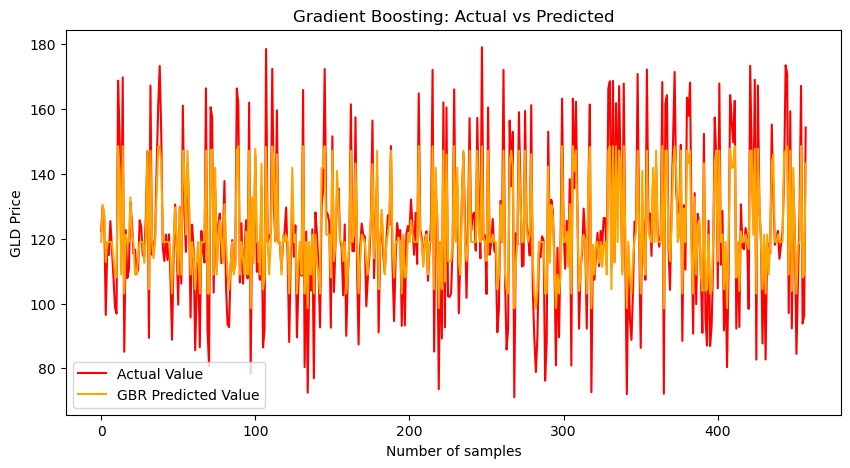

In [121]:
# Ensure same Y_test and test predictions are used
Y_test_series = pd.Series(Y_test).reset_index(drop=True)

# For Random Forest
plt.figure(figsize=(10, 5))
plt.plot(Y_test_series, color='red', label='Actual Value')
plt.plot(pd.Series(test_predictions_rfr), color='blue', label='RFR Predicted Value')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Number of samples')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# For Gradient Boosting
plt.figure(figsize=(10, 5))
plt.plot(Y_test_series, color='red', label='Actual Value')
plt.plot(pd.Series(test_predictions_gbr), color='orange', label='GBR Predicted Value')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Number of samples')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

| Aspect               | Random Forest (RFR) | Gradient Boosting (GBR)   |
| -------------------- | ------------------- | ------------------------- |
| Trend Capture        | Good                | Good                      |
| Smoothness           | Less (noisy)        | More (stable predictions) |
| Overfitting Risk     | Slightly higher     | Lower                     |
| Sharp Change Capture | Better              | Slightly worse            |


##### Conclusion:

Both models perform well, but:

RFR is more responsive but noisier.

GBR is smoother and more stable, with slightly less accuracy at extremes.

Choice depends on the trade-off between flexibility and generalization.


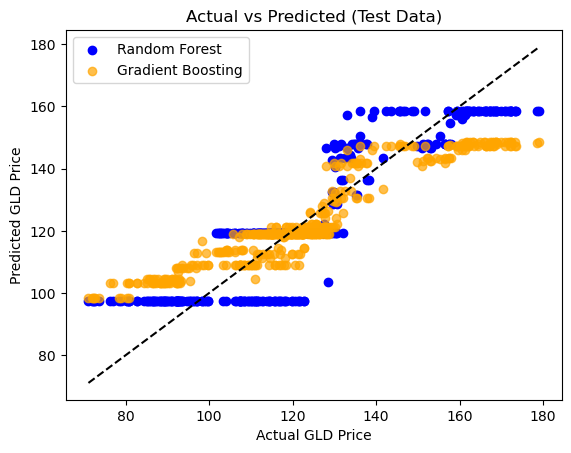

In [122]:
# Test data actual vs prediction 
rf_preds = pd.Series(test_predictions_rfr).reset_index(drop=True)
gbr_preds = pd.Series(test_predictions_gbr).reset_index(drop=True)

# Plot the test data actual vs prediction
plt.scatter(Y_test, test_predictions_rfr, color='blue', label='Random Forest')
plt.scatter(Y_test, test_predictions_gbr, color='orange', label='Gradient Boosting', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--')  # perfect line
plt.xlabel('Actual GLD Price')
plt.ylabel('Predicted GLD Price')
plt.title('Actual vs Predicted (Test Data)')
plt.legend()
plt.show()

##### Key Observations:

X-axis: Actual GLD prices

Y-axis: Predicted GLD prices

Blue dots: Predictions from Random Forest

Orange dots: Predictions from Gradient Boosting

Black dashed line: Ideal case (where prediction = actual)

Most points from both models are close to the diagonal line, indicating good prediction accuracy.

Gradient Boosting (orange):

Has tighter clustering near the diagonal.

Suggests more consistent predictions with fewer extreme errors.

Random Forest (blue):

Shows more spread and some clipping at certain values (e.g., flat lines around 100 or 160).

Indicates slightly higher variance or overfitting to certain ranges.

##### Conclusion:
Both models perform well, with predictions close to actual values.

Gradient Boosting shows better generalization and smoother behavior.

Random Forest is more reactive but may overfit in certain price ranges.

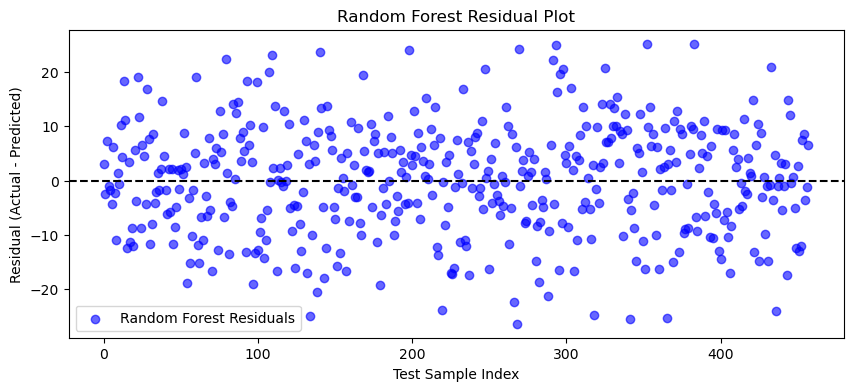

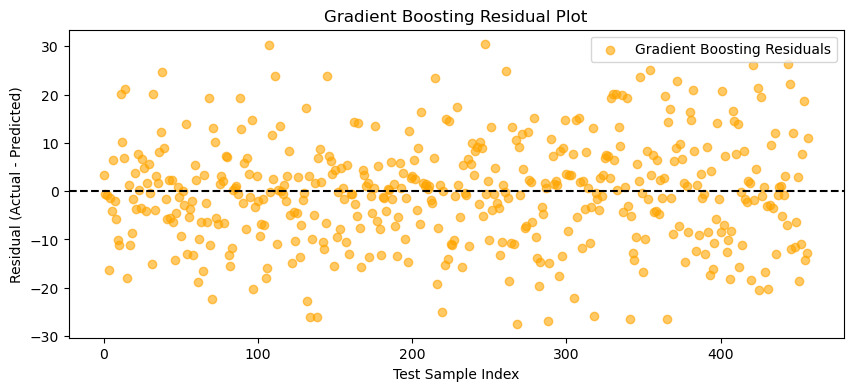

In [123]:
# Calculate residuals
#Y_test_series = pd.Series(Y_test).reset_index(drop=True)
rf_residuals = Y_test_series - rf_preds
gbr_residuals = Y_test_series - gbr_preds

# Plot residuals for Random Forest
plt.figure(figsize=(10, 4))
plt.scatter(range(len(rf_residuals)), rf_residuals, color='blue', label='Random Forest Residuals', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Random Forest Residual Plot')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.legend()
plt.show()

# Plot residuals for Gradient Boosting
plt.figure(figsize=(10, 4))
plt.scatter(range(len(gbr_residuals)), gbr_residuals, color='orange', label='Gradient Boosting Residuals', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gradient Boosting Residual Plot')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.legend()
plt.show()

##### Residual Plots 

These plots show the residuals (difference between actual and predicted gold prices) for both models.


##### Random Forest Residual Plot (Top):

Residuals spread widely around 0.

Some clustering and variance suggest inconsistent prediction errors.

Indicates possible overfitting or sensitivity to noise.

#####  Gradient Boosting Residual Plot (Bottom):

Residuals are more tightly clustered around 0.

Fewer extreme values more stable and consistent predictions.

Indicates better generalization and less error spread.

##### Conclusion :

Gradient Boosting has more balanced residuals → better model consistency.

Random Forest shows greater variance in errors, hinting at possible overfitting.

In [124]:
# Check if the residuals are equal or not
print("Are residuals equal?", (rf_residuals == gbr_residuals).all())

Are residuals equal? False


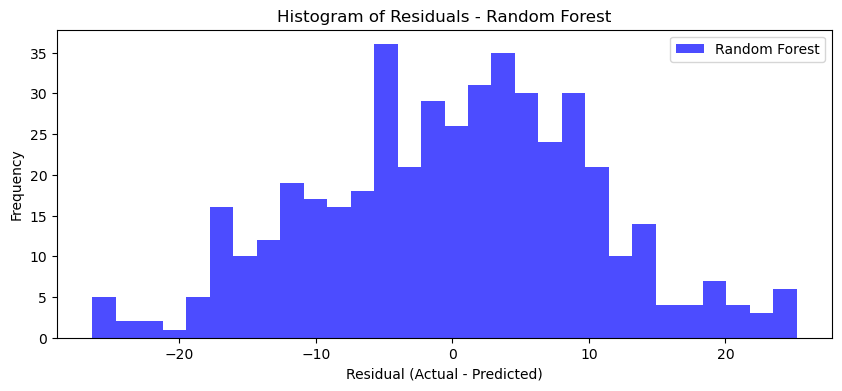

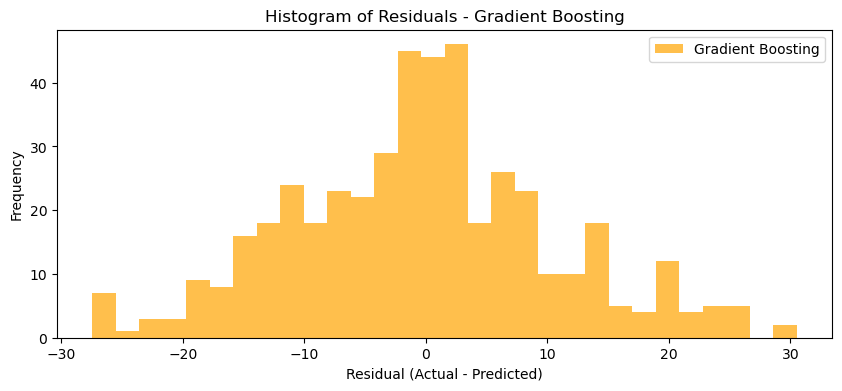

In [125]:
# Y_test_series, rf_preds, gbr_preds
rf_residuals = Y_test_series - rf_preds
gbr_residuals = Y_test_series - gbr_preds

# --- Histograms of Residuals ---

plt.figure(figsize=(10, 4))
plt.hist(rf_residuals, bins=30, color='blue', alpha=0.7, label='Random Forest')
plt.title('Histogram of Residuals - Random Forest')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(gbr_residuals, bins=30, color='orange', alpha=0.7, label='Gradient Boosting')
plt.title('Histogram of Residuals - Gradient Boosting')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


##### Histogram of Residuals – Short Explanation

These plots show how the errors (residuals) are distributed for both models.

##### Random Forest Residuals (Top):

Residuals mostly centered around 0, but spread across -25 to +25.

Some skew and wider spread → indicates higher error variability.

#####  Gradient Boosting Residuals (Bottom):

Also centered around 0, but more concentrated and slightly narrower.

Fewer extreme values → indicates more stable and consistent predictions.

##### Conclusion :

Both models are fairly accurate, but

Gradient Boosting has a tighter residual distribution, suggesting better generalization and lower error variance.



## Model Evaluation

In [126]:
# --- Error Metrics ---
def evaluate_model(name, y_true, y_pred):
    
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"R² Score : {r2:.4f}")
    

# Ensure Y_test is a proper Series
Y_test_series = pd.Series(Y_test).reset_index(drop=True)

# Evaluate Random Forest
evaluate_model("Random Forest", Y_test_series, test_predictions_rfr)

# Evaluate Gradient Boosting
evaluate_model("Gradient Boosting", Y_test_series, test_predictions_gbr)



Random Forest Evaluation:
R² Score : 0.8137

Gradient Boosting Evaluation:
R² Score : 0.7875


##### Conclusion:
Random Forest performs slightly better on the test set.

Both models show strong performance with high R² values, making them reliable for gold price prediction.